# Forecasting with a Prophet 📉

https://youtu.be/pOYAXv15r3A

One piece of recent open software is facebook's `prophet`. This uses a model which is similar to a **generalised additive model** (GAM), a class of additive (linear) models with potentially non-linear components. 

The model is easily interpreted (as a sum of components) and simple to fit (parameters have a strightforward interpretation).
But if the hypothesis of the parametric model are not respected, the fitted model may seriously underfit.

You can read more about the underlying model [here](https://peerj.com/preprints/3190/).

As you are beginning to see time series forecasting can sometimes be as much an art as a science, and we know it takes quite some practice to become a good artist. The authors of the software had this in mind when they wrote it.  One of their aims is to provide software which can be used easily by those who have a little timeseries knowledge. Let's see how this goes....We will apply this software to the airline data now.

To install prophet I advise you to install a completely clean virtualenvironment with conda (you will find the instructions to do this [here](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-environments.html)).

Then you can install prophet with: `conda install -c conda-forge fbprophet`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns 
import matplotlib.style as style

/tmp/ipykernel_17410/3541528182.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from neuralprophet import NeuralProphet


# Example 1 - airline data

We setup the data as we had done so before in the ARIMA example.

In [3]:
from pmdarima.datasets import load_airpassengers

START_DATE = '1949-01-01'
airline = load_airpassengers(as_series=True)

#there's no datetimeindex from the bundled dataset. So let's add one.
airline.index= pd.date_range(START_DATE, 
                             periods=len(airline), 
                             freq='MS')

In [4]:
airline.head()

1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Freq: MS, dtype: float64

In [5]:
def ts_train_test_split(data, split_date):
    '''
    Split time series into training and test data
    
    Parameters:
    -------
    data - pd.DataFrame - time series data.  Index expected as datatimeindex
    split_date - the date on which to split the time series
    
    Returns:
    --------
    tuple (len=2) 
    0. pandas.DataFrame - training dataset
    1. pandas.DataFrame - test dataset
    '''

    train = data.loc[data.index < split_date]
    test = data.loc[data.index >= split_date]
    return train, test


In [6]:
#for cv need all of the training data joined together.
airline_adj = airline / airline.index.days_in_month

train, test = ts_train_test_split(airline_adj, '1960-01-01')
train_log, test_log = np.log(train), np.log(test) # get logged values for arima model


## Forecasting with prophet

Fitting a basic model and making predictions is very simple with `prophet`.

In [7]:
#from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()

Training data is expected in this df format below.

In [8]:
train_df = pd.DataFrame(train).reset_index().rename(columns = {0:'y','index':'ds'})

In [9]:
train_df.tail()

,ds,y
127,1959-08-01,18.032258
128,1959-09-01,15.433333
129,1959-10-01,13.129032
130,1959-11-01,12.066667
131,1959-12-01,13.064516


Fit model...

In [10]:
#!pip install ipywidgets
#!pip install ipywidgets --upgrade


In [11]:
model = NeuralProphet()

# Fit the model to the training data
model.fit(train_df, freq='MS')  # MS stands for monthly frequency

# Generate predictions for future dates
future = model.make_future_dataframe(train_df, periods=12)
forecast = model.predict(future)

# Optionally, you can plot the forecast
fig = model.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showw

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/d

Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:94: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt

Make predictions...

In [13]:
# Assuming 'train_df' is your training DataFrame
model = NeuralProphet()

# Fit the model to the training data
model.fit(train_df, freq='MS')  # MS stands for monthly frequency

# Generate predictions for future dates
future = model.make_future_dataframe(train_df, periods=12, n_historic_predictions=len(train_df))
forecast = model.predict(future)

# 'forecast' DataFrame now contains predictions for both historical and future dates
# The 'yhat1' column contains the predicted values
print(forecast[['ds', 'yhat1']].tail(12))  # Display the last 12 rows (future predictions)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


            ds      yhat1
132 1960-01-01  13.561491
133 1960-02-01  13.999893
134 1960-03-01  14.528151
135 1960-04-01  14.576942
136 1960-05-01  14.493626
137 1960-06-01  16.199566
138 1960-07-01  17.006721
139 1960-08-01  17.309954
140 1960-09-01  15.854822
141 1960-10-01  14.369095
142 1960-11-01  13.621948
143 1960-12-01  14.248270


In [47]:
#future = model.make_future_dataframe(periods=12, 
 #                                    freq='MS', 
  #                                   include_history=True) 
#create a dataframe with the prediction datetimes we want
#future.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


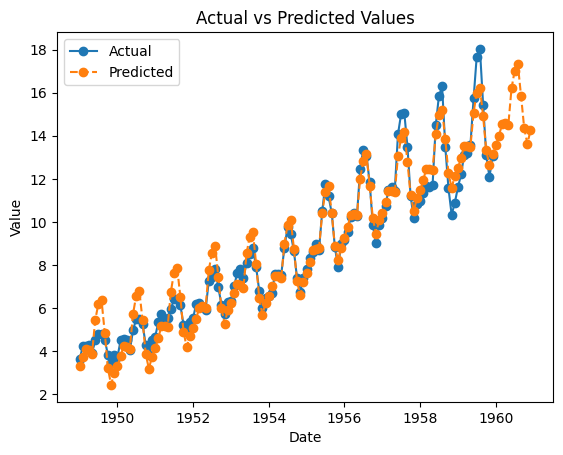

In [15]:
# Plotting the actual values
plt.plot(train_df['ds'], train_df['y'], label='Actual', marker='o')

# Plotting the predicted values
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted', linestyle='--', marker='o')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()

In [48]:
#forecast = model.predict(future)
#y_pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds')

In [29]:

import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

# define confidence interval
confidence_level = 0.9
boundaries = round((1 - confidence_level) / 2, 2)
quantiles = [boundaries, confidence_level + boundaries]

# Assuming 'train_df' is your training DataFrame
model = NeuralProphet(quantiles=quantiles)

# Fit the model to the training data
model.fit(train_df, freq='MS')  # MS stands for monthly frequency

# Generate predictions for future dates
future = model.make_future_dataframe(train_df, periods=12, n_historic_predictions=len(train_df))
forecast = model.predict(future)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Predicting: 5it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [30]:
forecast

,ds,y,yhat1,yhat1 5.0%,yhat1 95.0%,trend,season_yearly
0,1949-01-01,3.612903,3.124802,2.107696,3.997101,4.188853,-1.064051
1,1949-02-01,4.214286,3.644742,2.772661,4.678571,4.194180,-0.549438
2,1949-03-01,4.258065,4.049299,3.101543,4.926694,4.198992,-0.149693
3,1949-04-01,4.300000,4.034840,3.100822,4.942593,4.204319,-0.169479
4,1949-05-01,3.903226,3.860963,2.992705,4.605297,4.209475,-0.348512
...,...,...,...,...,...,...,...
139,1960-08-01,NaN,17.115688,15.713667,18.775963,15.072412,2.043275
140,1960-09-01,NaN,15.879204,14.894379,16.784004,15.159367,0.719837
141,1960-10-01,NaN,14.271008,13.423136,15.176744,15.243517,-0.972509
142,1960-11-01,NaN,13.547264,12.250967,14.526281,15.330471,-1.783208


In [32]:
model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:94: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '58fb2adf-e556-4015-9cd6-c6a19dedcee1',
              'x': array([datetime.datetime(1949, 1, 1, 0, 0),
                          datetime.datetime(1949, 2, 1, 0, 0),
                          datetime.datetime(1949, 3, 1, 0, 0),
                          datetime.datetime(1949, 4, 1, 0, 0),
                          datetime.datetime(1949, 5, 1, 0, 0),
                          datetime.datetime(1949, 6, 1, 0, 0),
                          datetime.datetime(1949, 7, 1, 0, 0),
                          datetime.datetime(1949, 8, 1, 0, 0),
                          datetime.datetime(1949, 9, 1, 0, 0),
                          datetime.datetime(1949, 10, 1, 0, 0),
                          datetime.datetime(1949, 11, 1, 0, 0),
                       

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




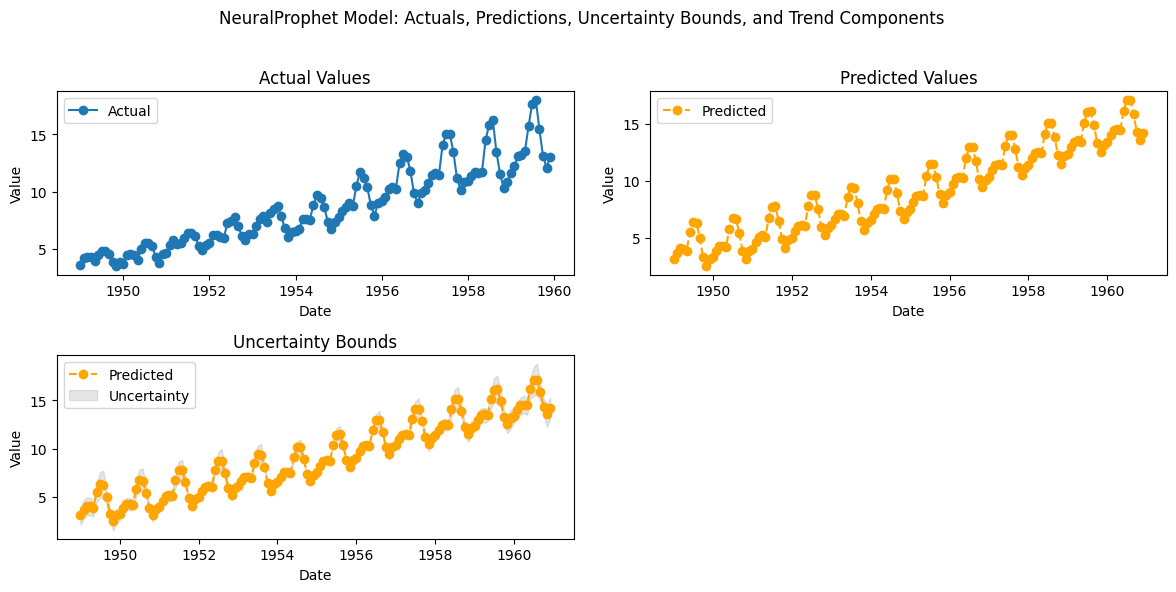

In [34]:
# Plotting the actual values
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(train_df['ds'], train_df['y'], label='Actual', marker='o')
plt.title('Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

 # Plotting the predicted values
plt.subplot(2, 2, 2)
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted', linestyle='--', marker='o', color='orange')
plt.title('Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

 # Plotting the uncertainty bounds
plt.subplot(2, 2, 3)
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted', linestyle='--', marker='o', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat1 5.0%'], forecast['yhat1 95.0%'], color='gray', alpha=0.2, label='Uncertainty')
plt.title('Uncertainty Bounds')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

 # Plotting the trend components
components = model.plot_components(forecast, figsize=(12, 6))

 # Adding overall title
plt.suptitle('NeuralProphet Model: Actuals, Predictions, Uncertainty Bounds, and Trend Components')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for suptitle

 # Display the plots
plt.show()

Plot predictions...

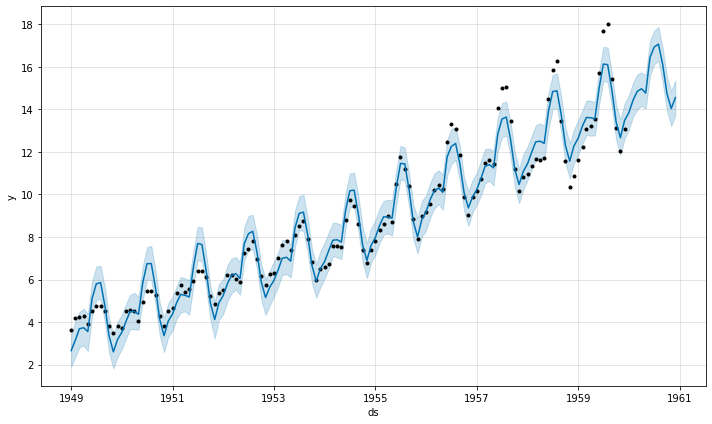

In [49]:
fig = model.plot(forecast)
# test.plot(style='.r')

Evaluating this baseline model error on test set...

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    MAPE

    Parameters:
    --------
    y_true -- np.array actual observations from time series
    y_pred -- the predictions to evaluate

    Returns:
    -------
    float, scalar value representing the MAPE (0-100)
    '''
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
#mean_absolute_percentage_error(test.values , 
 #                              forecast['yhat'][-12:])

We at least see it beats the naive model scores  that we saw in the last notebook (from the unlogged data). Not bad for only several lines of code. But looking at the plot it is clearly not fitting well. We should use cross validation to find a better fitting model (before we evaluated in the test set!).

## Cross validation in prophet

There are cross validation functions in `prophet` that take care of time series data and can perform adjustable rolling windows as we had previously seen in other time series cross validation functions.

In [37]:
from neuralprophet import NeuralProphet, set_log_level

In [38]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}

#df = pd.read_csv(data_location + "air_passengers.csv")
folds = NeuralProphet(**params).crossvalidation_split_df(train_df, freq="MS", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.242]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

In [42]:
folds[4]

(            ds          y
 0   1949-01-01   3.612903
 1   1949-02-01   4.214286
 2   1949-03-01   4.258065
 3   1949-04-01   4.300000
 4   1949-05-01   3.903226
 ..         ...        ...
 101 1957-06-01  14.066667
 102 1957-07-01  15.000000
 103 1957-08-01  15.064516
 104 1957-09-01  13.466667
 105 1957-10-01  11.193548
 
 [106 rows x 2 columns],
             ds          y
 106 1957-11-01  10.166667
 107 1957-12-01  10.838710
 108 1958-01-01  10.967742
 109 1958-02-01  11.357143
 110 1958-03-01  11.677419
 111 1958-04-01  11.600000
 112 1958-05-01  11.709677
 113 1958-06-01  14.500000
 114 1958-07-01  15.838710
 115 1958-08-01  16.290323
 116 1958-09-01  13.466667
 117 1958-10-01  11.580645
 118 1958-11-01  10.333333
 119 1958-12-01  10.870968
 120 1959-01-01  11.612903
 121 1959-02-01  12.214286
 122 1959-03-01  13.096774
 123 1959-04-01  13.200000
 124 1959-05-01  13.548387
 125 1959-06-01  15.733333
 126 1959-07-01  17.677419
 127 1959-08-01  18.032258
 128 1959-09-01  15.433333
 

    train_df: training DataFrame.
    freq: The frequency of the time series data, set to "MS" (monthly) in this case.
    k: The number of folds for cross-validation (in this case, 5).
    fold_pct: The percentage of the dataset to include in each fold.
    fold_overlap_pct: The percentage of overlap between consecutive folds.

In [44]:
import pandas as pd

In [47]:
metrics_train_list = []
metrics_test_list = []

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train = m.fit(df=df_train, freq="MS")
    test = m.test(df=df_test)
    metrics_train_list.append(train[METRICS].iloc[-1])
    metrics_test_list.append(test[METRICS_VAL].iloc[-1])

# Convert lists to DataFrames
metrics_train = pd.DataFrame(metrics_train_list)
metrics_test = pd.DataFrame(metrics_test_list)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.148]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.154]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Testing: 0it [00:00, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.507]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.11230448633432388
         MAE_val            1.0091667175292969
        RMSE_val            1.1160966157913208
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.154]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Testing: 0it [00:00, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.75]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: 

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.20548589527606964
         MAE_val            1.6652779579162598
        RMSE_val            1.8909879922866821
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.154]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Testing: 0it [00:00, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [98.925]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.006649767514318228
         MAE_val            0.31695953011512756
        RMSE_val            0.37895795702934265
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.154]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Testing: 0it [00:00, ?it/s]

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.057]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152:

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.019449379295110703
         MAE_val             0.622765839099884
        RMSE_val            0.8584004640579224
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [96.154]% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/shahaf.hen@Digital-Grenoble.local/.anaconda3/envs/timeseries2/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to ch

Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.017159970477223396
         MAE_val             0.839400589466095
        RMSE_val            0.9587191343307495
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [58]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE_val,RMSE_val
mean,0.890714,1.040632
std,0.504382,0.549211
min,0.316960,0.378958
max,1.665278,1.890988


In [52]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [53]:
365.25*4

1461.0

In [54]:
model = Prophet()
model.fit(train_df)
df_cv = cross_validation(model, 
                         initial='1461 days', 
                         period='365 days', 
                         horizon = '365 days')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 6 forecasts with cutoffs between 1953-12-02 00:00:00 and 1958-12-01 00:00:00
100%|██████████| 6/6 [00:09<00:00,  1.58s/it]


In [49]:
metrics_train.head()

,MAE,RMSE
819,0.146648,0.183627
701,0.195052,0.230032
621,0.166900,0.207244
563,0.182090,0.228467
519,0.177265,0.220338


In [50]:
metrics_test.head()

,MAE_val,RMSE_val
0,1.009167,1.116097
0,1.665278,1.890988
0,0.316960,0.378958
0,0.622766,0.858400
0,0.839401,0.958719


A function for performance metrics and plotting...

In [56]:
df_p = performance_metrics(df_cv)

In [57]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,61 days,0.731749,0.855423,0.708125,0.079015,0.071685,0.380952
1,62 days,0.900625,0.949012,0.825101,0.085354,0.086172,0.285714
2,89 days,0.744382,0.862776,0.713703,0.075617,0.086172,0.333333
3,90 days,0.574954,0.758257,0.584116,0.054702,0.041338,0.571429
4,120 days,0.471565,0.686706,0.544250,0.054785,0.050609,0.500000


In [53]:
fig = plot_cross_validation_metric(metrics_test, metric='mape')
plt.show()

NameError: name 'plot_cross_validation_metric' is not defined

The plot above is the standard output plot of the CV from `prophet`. It is different to what we have looked at before. Each grey point represents a prediction, made on a particular month. Because we made predictions over several horizons each are plotted on the graph. At around horizon 30 for example we see each of the plots over the first month of each of the 6, 12 month validations. The blue line shows a rolling window of the mape scores 'averaged' over the cv predictions. More info [here](https://facebook.github.io/prophet/docs/diagnostics.html).

We are normally interested in the mean and std of the MAPE scores found at each window. This can be calculated from the dataframe returned from the `cross_validation` function above, using the function below. 

In [59]:
def mape_performance_calc(df_cv):
    " function to replace prophet cv 'performance metrics' function"
    df_cv['mape'] = abs(df_cv['y'] - df_cv['yhat']) /df_cv['y'] # make column with individual abs normalised values
    results = df_cv.groupby(['cutoff']).mean() # finish mape calc for each of the folds (distinguised in 'cutoff' column of df_cv)
    results = results.describe() # sumarise folds information
    results = results['mape']# # return only mape column
    return(results)

mape_performance_calc(df_cv)

count    6.000000
mean     0.072154
std      0.020667
min      0.052698
25%      0.059283
50%      0.066481
75%      0.077062
max      0.109789
Name: mape, dtype: float64

We find a MAPE of ~7.2% with std ~2%. This would have estimated the error we saw on the test set to a good degree.

## Hyper-parameters

The model plot we saw earlier did not fit very well to the train data. We can change the model assumptions (like hyper-parameters) to change how well it is fitting the train data.

`Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)`

**TASK**

* Try changing some of these. [This](https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3) blog is very useful in explaining the parameters and what they do.
* Find at least one change which improves your model cross validation score

In [60]:
#### your solution here 






# Exercise 1 - energy data forecasting ⚡

Forecasting energy demand is big business and very important in helping energy producers maintain the balance within the electrical grid. You can find forecasts of energy demands for France in realtime [here](https://www.rte-france.com/fr/eco2mix/eco2mix-consommation). The data was already downloaded in the `data/nats.csv` file.

Your mission now is to imagine a useful use-case for an enterprise and use `Prophet` to make forecasts on the energy data you have already seen (in data viz module) for France! Feel free to choose :
* the type of energy generation/consommation
* france or regional,
* frequency scale you wish to try!

Try and consider a forecast horizon that seems useful for the frequency at which you are making your predictions e.g. predicting the hourly forecast for 12 months propbably cannot be used in any meaningful way - and is probably not going be very easy to forecast accurately.

Consider that:
* Reducing the scale of the data, i.e. to regional
* Higher frequency predictions
* longer periods of forecast

...are likely to make it more difficult to make a good forecast.

Consider also that you must pick the most suitable cross validation procedure for your problem. Consider the initial, step and horizon you will use carefully.

Once you have made your model:
1. Compare it to a naive model!! If it does not beat this then try reducing your forecast horizon to find at what scale you can make useful predictions.
2. Try tuning the model in some way to improve performance (add holidays might be a good idea)
3. If you have time compare your model to an ARIMA model. Why might there be differences in perfomance between the two approachecs to forecasting?

(feel free to use a new notebook for this task!)